# Local Outlier Factor

Algoritme Faktor Outlier Lokal (LOF) adalah metode deteksi anomali tanpa pengawasan yang menghitung deviasi kerapatan lokal dari titik data tertentu terhadap tetangganya. Algoritma ini mengukur seberapa jauh suatu titik data berbeda dari tetangga terdekatnya dengan membandingkan kepadatan lokal titik tersebut terhadap kepadatan lokal titik-titik di sekitarnya.

## Konsep Dasar LOF

1. Kepedekatan Local(Local Density)


*   LOF menggunakan konsep k-tetangga terdekat (k-nearest neighbors) untuk menentukan kepadatan suatu titik dibandingkan dengan kepadatan tetangganya.
*   Jika suatu titik memiliki kepadatan yang jauh lebih rendah dibandingkan tetangganya, maka titik tersebut kemungkinan merupakan outlier.

2. Rasio Kepadatan Relatif

* LOF menghitung nilai kepadatan relatif dari suatu titik dengan membandingkan dengan titik titik di sekitarnya.
* Nilai LOF yang lebih besar menunjukkan bahwa titik tersebut lebih cenderung menjadi outlier

3. Interpretasi Niai LOF

* Dapat menangani dataset dengan distribusi yang tidak seragam
* tidak hanya mempertimbangkan jarak absolut,tetapi juga kepadatan relatif sehingga lebih efektif dalam mendeteksi outlier lokal


## Kelebihan LOF

* Dapat menangani dataset dengan distribusi yang seragam.
* tidak hanya mempertimbangkan jarak obsolut, tetapi juga kepadatan relatif,sehingga lebih efektif dalam mendeteksi outlier

## Kekurangan LOF

* Pemilihan parameter k sangat mempengaruhi hasil
* Komputasi relatif mahal karena melibatkan perhitungan jarak ke k-tetagga terdekat.


## Tahapan penerapan konsep penggunaan LOF



1. Menampilkan data

In [1]:
import pandas as pd  # Import library pandas

# Data tanpa tanda kurung ekstra
data = [
    [2, 4], [4, 5], [2, 3], [5, 6], [6, 7],
    [7, 8], [8, 9], [9, 10], [80, 110], [10, 11]
]

# Membuat DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])

# Menampilkan tabel
print(df)


    X    Y
0   2    4
1   4    5
2   2    3
3   5    6
4   6    7
5   7    8
6   8    9
7   9   10
8  80  110
9  10   11


2. Menentukan K-Neighbors
* banyak tetangga yang digunakan sebagai parameter
* Contoh: k=3 Maka 3 titik yang merupakan tetangga terdekat dari setiap

Hitung jarak menggunakan rumus euncludean distance:


$
d(A, B) = \sqrt{(x_B - x_A)^2 + (y_B - y_A)^2}
$

In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Data awal
data = np.array([
    [2, 4], [4, 5], [2, 3], [5, 6], [6, 7],
    [7, 8], [8, 9], [9, 10], [80, 110], [10, 11]
])

# Membuat DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Menyimpan indeks dan jarak tetangga terdekat
k = 3  # Jumlah tetangga terdekat
neighbors_indices = []
neighbors_distances = []

# Mencari k tetangga terdekat untuk setiap titik
for i, point in enumerate(data):
    distances = []
    for j, other_point in enumerate(data):
        if i != j:
            distances.append((j, euclidean_distance(point, other_point)))  # (index, distance)

    # Urutkan berdasarkan jarak (terdekat ke terjauh) dan ambil k tetangga
    distances.sort(key=lambda x: x[1])
    nearest_neighbors = distances[:k]

    # Simpan indeks dan jarak tetangga ke-1, ke-2, ke-3
    neighbors_indices.append([idx for idx, _ in nearest_neighbors])
    neighbors_distances.append([dist for _, dist in nearest_neighbors])

# Menambahkan hasil ke DataFrame
for i in range(3):  # Ambil 3 tetangga terdekat
    df[f'k-neighbors_{i+1}'] = [neighbors_distances[j][i] for j in range(len(data))]
    df[f'k-index_{i+1}'] = [neighbors_indices[j][i] for j in range(len(data))]

# Menampilkan tabel dalam format rapi
print(tabulate(df, headers='keys', tablefmt='grid'))


+----+-----+-----+-----------------+-------------+-----------------+-------------+-----------------+-------------+
|    |   X |   Y |   k-neighbors_1 |   k-index_1 |   k-neighbors_2 |   k-index_2 |   k-neighbors_3 |   k-index_3 |
+====+=====+=====+=================+=============+=================+=============+=================+=============+
|  0 |   2 |   4 |         1       |           2 |         2.23607 |           1 |         3.60555 |           3 |
+----+-----+-----+-----------------+-------------+-----------------+-------------+-----------------+-------------+
|  1 |   4 |   5 |         1.41421 |           3 |         2.23607 |           0 |         2.82843 |           2 |
+----+-----+-----+-----------------+-------------+-----------------+-------------+-----------------+-------------+
|  2 |   2 |   3 |         1       |           0 |         2.82843 |           1 |         4.24264 |           3 |
+----+-----+-----+-----------------+-------------+-----------------+------------

3. Menentukan k-Distance

* jarak antara titik dengan tetangga ke-K terdekat
* contoh: K=3 -> jarak ke tetangga ketiga terdekat

In [3]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Data awal
data = np.array([
    [2, 4], [4, 5], [2, 3], [5, 6], [6, 7],
    [7, 8], [8, 9], [9, 10], [80, 110], [10, 11]
])

# Membuat DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Menyimpan k-distance
k = 3  # Tetangga ke-3
k_distances = []

# Mencari k-distance untuk setiap titik
for i, point in enumerate(data):
    distances = []
    for j, other_point in enumerate(data):
        if i != j:
            distances.append(euclidean_distance(point, other_point))  # Simpan jarak

    distances.sort()  # Urutkan jarak dari kecil ke besar
    k_distances.append(distances[k-1])  # Ambil jarak ke tetangga ke-3

# Menambahkan k-distance ke DataFrame
df['k-distance'] = k_distances

# Menampilkan tabel hanya dengan k-distance
print(tabulate(df[['X', 'Y', 'k-distance']], headers='keys', tablefmt='grid'))


+----+-----+-----+--------------+
|    |   X |   Y |   k-distance |
+====+=====+=====+==============+
|  0 |   2 |   4 |      3.60555 |
+----+-----+-----+--------------+
|  1 |   4 |   5 |      2.82843 |
+----+-----+-----+--------------+
|  2 |   2 |   3 |      4.24264 |
+----+-----+-----+--------------+
|  3 |   5 |   6 |      2.82843 |
+----+-----+-----+--------------+
|  4 |   6 |   7 |      2.82843 |
+----+-----+-----+--------------+
|  5 |   7 |   8 |      2.82843 |
+----+-----+-----+--------------+
|  6 |   8 |   9 |      2.82843 |
+----+-----+-----+--------------+
|  7 |   9 |  10 |      2.82843 |
+----+-----+-----+--------------+
|  8 |  80 | 110 |    124.036   |
+----+-----+-----+--------------+
|  9 |  10 |  11 |      4.24264 |
+----+-----+-----+--------------+


3. Menentukan RD(Reachability Distance)

**Reachability Distance (RD)** adalah ukuran dalam algoritma clustering (seperti **OPTICS**) yang menunjukkan seberapa jauh sebuah titik \(A\) "terjangkau" dari titik \(B\).

RD mempertimbangkan dua hal:  
1. **k-distance(B)**: Jarak minimum agar \(B\) memiliki setidaknya \(k\) tetangga.  
2. **d(A, B)**: Jarak langsung antara \(A\) dan \(B\).

RD dihitung sebagai nilai maksimum dari kedua jarak tersebut. Ini membantu dalam menentukan kepadatan data dan struktur klaster, di mana titik yang lebih dekat (dengan RD kecil) dianggap lebih terhubung dalam suatu klaster. Dengan Rumus:

${reachability-distance}_k(A, B) = \max\{k\text{-distance}(B), d(A, B)\}$


In [4]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# Data awal
data = np.array([
    [2, 4], [4, 5], [2, 3], [5, 6], [6, 7],
    [7, 8], [8, 9], [9, 10], [80, 110], [10, 11]
])

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Parameter k
k = 3

# List untuk menyimpan hasil RD setiap titik
rd_results = []

# Menghitung RD untuk setiap indeks
for index_A, point_A in enumerate(data):
    # Menghitung jarak dari A ke semua titik lain
    distances = []
    for j, other_point in enumerate(data):
        if index_A != j:
            distances.append((j, euclidean_distance(point_A, other_point)))  # (index, distance)

    # Urutkan berdasarkan jarak dan ambil k tetangga terdekat
    distances.sort(key=lambda x: x[1])
    nearest_neighbors = distances[:k]
    k_distance_A = nearest_neighbors[-1][1]  # k-distance dari A

    # Menentukan k-distance untuk setiap tetangga
    k_distances_B = {}
    for neighbor_index, _ in nearest_neighbors:
        neighbor_distances = []
        for j, other_point in enumerate(data):
            if neighbor_index != j:
                neighbor_distances.append(euclidean_distance(data[neighbor_index], other_point))

        neighbor_distances.sort()
        k_distances_B[neighbor_index] = neighbor_distances[k-1]  # k-distance dari B

    # Menghitung RD untuk setiap tetangga
    RD_values = []
    RD_neighbors = []
    for neighbor_index, distance in nearest_neighbors:
        RD_AB = max(k_distances_B[neighbor_index], distance)
        RD_values.append(RD_AB)
        RD_neighbors.append(round(RD_AB, 3))


    # Menyimpan hasil
    rd_results.append([
        index_A,
        nearest_neighbors[0][0], round(nearest_neighbors[0][1], 3), RD_neighbors[0],
        nearest_neighbors[1][0], round(nearest_neighbors[1][1], 3), RD_neighbors[1],
        nearest_neighbors[2][0], round(nearest_neighbors[2][1], 3), RD_neighbors[2]
    ])

# Membuat DataFrame untuk hasil RD
df_rd = pd.DataFrame(rd_results, columns=[
    "Indeks",
    "Tetangga_1", "Jarak_1", "RD_1",
    "Tetangga_2", "Jarak_2", "RD_2",
    "Tetangga_3", "Jarak_3", "RD_3"
])

# Menampilkan hasil dalam bentuk tabel
print(tabulate(df_rd, headers="keys", tablefmt="grid"))


+----+----------+--------------+-----------+---------+--------------+-----------+---------+--------------+-----------+---------+
|    |   Indeks |   Tetangga_1 |   Jarak_1 |    RD_1 |   Tetangga_2 |   Jarak_2 |    RD_2 |   Tetangga_3 |   Jarak_3 |    RD_3 |
+====+==========+==============+===========+=========+==============+===========+=========+==============+===========+=========+
|  0 |        0 |            2 |     1     |   4.243 |            1 |     2.236 |   2.828 |            3 |     3.606 |   3.606 |
+----+----------+--------------+-----------+---------+--------------+-----------+---------+--------------+-----------+---------+
|  1 |        1 |            3 |     1.414 |   2.828 |            0 |     2.236 |   3.606 |            2 |     2.828 |   4.243 |
+----+----------+--------------+-----------+---------+--------------+-----------+---------+--------------+-----------+---------+
|  2 |        2 |            0 |     1     |   3.606 |            1 |     2.828 |   2.828 |      

4. Menghitung Kepadatan Capaian Local (LRD)

Local Reachability Density (LRD) adalah kebalikan dari rata-rata Reachability Distance (RD) dari suatu titik ke tetangga terdekatnya. LRD digunakan dalam algoritma Local Outlier Factor (LOF) untuk mengukur kepadatan lokal suatu titik dibandingkan dengan tetangganya.

Rumus:

$
LRD(A) = \frac{k}{\sum_{B \in kNN(A)} RD(A, B)}
$

Intrepretasi:

* LRD rendah -> Wilayah jarang (calon outlier)
* LRD Tinggi -> wilayah padat


In [5]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Data awal
data = np.array([
    [2, 4], [4, 5], [2, 3], [5, 6], [6, 7],
    [7, 8], [8, 9], [9, 10], [80, 110], [10, 11]
])

# Membuat DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Parameter k (jumlah tetangga)
k = 3

# Menyimpan indeks dan jarak tetangga terdekat
neighbors_indices = []
neighbors_distances = []

# Mencari k tetangga terdekat untuk setiap titik
for i, point in enumerate(data):
    distances = []
    for j, other_point in enumerate(data):
        if i != j:
            distances.append((j, euclidean_distance(point, other_point)))  # (index, distance)

    # Urutkan berdasarkan jarak dan ambil k tetangga terdekat
    distances.sort(key=lambda x: x[1])
    nearest_neighbors = distances[:k]

    # Simpan indeks dan jarak tetangga
    neighbors_indices.append([idx for idx, _ in nearest_neighbors])
    neighbors_distances.append([dist for _, dist in nearest_neighbors])

# Hitung RD untuk setiap indeks
reachability_distances = []
for i in range(len(data)):
    rd_values = []
    for j, neighbor_idx in enumerate(neighbors_indices[i]):
        core_distance = max(neighbors_distances[neighbor_idx])  # Core distance dari neighbor
        rd = max(core_distance, neighbors_distances[i][j])
        rd_values.append(rd)
    reachability_distances.append(rd_values)

# Hitung LRD untuk setiap titik
lrd_values = []
for i in range(len(data)):
    sum_rd = sum(reachability_distances[i])
    lrd = k / sum_rd if sum_rd != 0 else 0
    lrd_values.append(lrd)

# Menambahkan hasil ke DataFrame
df['LRD'] = lrd_values

# Menampilkan hasil dalam bentuk tabel
print(tabulate(df, headers='keys', tablefmt='grid'))


+----+-----+-----+------------+
|    |   X |   Y |        LRD |
+====+=====+=====+============+
|  0 |   2 |   4 | 0.280988   |
+----+-----+-----+------------+
|  1 |   4 |   5 | 0.280988   |
+----+-----+-----+------------+
|  2 |   2 |   3 | 0.280988   |
+----+-----+-----+------------+
|  3 |   5 |   6 | 0.353553   |
+----+-----+-----+------------+
|  4 |   6 |   7 | 0.353553   |
+----+-----+-----+------------+
|  5 |   7 |   8 | 0.353553   |
+----+-----+-----+------------+
|  6 |   8 |   9 | 0.353553   |
+----+-----+-----+------------+
|  7 |   9 |  10 | 0.303046   |
+----+-----+-----+------------+
|  8 |  80 | 110 | 0.00815382 |
+----+-----+-----+------------+
|  9 |  10 |  11 | 0.303046   |
+----+-----+-----+------------+


5. Menentukan Faktor Outlier Local(LOF)

Rumus:

$
\text{LOF}_k(A) := \frac{1}{|N_k(A)|} \sum_{B \in N_k(A)} \frac{\text{lrd}_k(B)}{\text{lrd}_k(A)} = \frac{1}{|N_k(A)| \cdot \text{lrd}_k(A)} \sum_{B \in N_k(A)} \text{lrd}_k(B)
$


Interpretasi:

* LOF ≈ 1 ->inlier(kepadatan mirip tetangga)
* LOF > 1 ->Outlier(kepadatan lebih rendah

In [6]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from tabulate import tabulate

# Data awal
data = np.array([
    [2, 4], [4, 5], [2, 3], [5, 6], [6, 7],
    [7, 8], [8, 9], [9, 10], [80, 110], [10, 11]
])

# Jumlah tetangga k
k = 3

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(p1, p2):
    return euclidean(p1, p2)

# Mencari k tetangga terdekat untuk setiap titik
neighbors_indices = []
k_distance = []

for i, point in enumerate(data):
    distances = [(j, euclidean_distance(point, other)) for j, other in enumerate(data) if i != j]
    distances.sort(key=lambda x: x[1])  # Urutkan berdasarkan jarak
    nearest_neighbors = distances[:k]

    neighbors_indices.append([idx for idx, _ in nearest_neighbors])
    k_distance.append(nearest_neighbors[-1][1])  # k-distance adalah jarak ke tetangga ke-k

# Menghitung Reachability Distance (RD)
rd_values = []
for i in range(len(data)):
    rd_i = [max(k_distance[j], euclidean_distance(data[i], data[j])) for j in neighbors_indices[i]]
    rd_values.append(rd_i)

# Menghitung Local Reachability Density (LRD)
lrd_values = [k / sum(rd) for rd in rd_values]

# Menghitung Local Outlier Factor (LOF)
lof_values = []
for i in range(len(data)):
    lof = sum(lrd_values[j] for j in neighbors_indices[i]) / (k * lrd_values[i])
    lof_values.append(lof)

# Menandai outlier berdasarkan threshold LOF > 1.5
outlier_labels = ["Outlier" if lof > 1.5 else "Normal" for lof in lof_values]

# Membuat DataFrame untuk hasil akhir
df = pd.DataFrame(data, columns=['X', 'Y'])
df['LOF'] = lof_values
df['Outlier'] = outlier_labels

# Menampilkan tabel dengan format rapi
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+-----+-----+-----------+-----------+
|    |   X |   Y |       LOF | Outlier   |
+====+=====+=====+===========+===========+
|  0 |   2 |   4 |  1.08608  | Normal    |
+----+-----+-----+-----------+-----------+
|  1 |   4 |   5 |  1.08608  | Normal    |
+----+-----+-----+-----------+-----------+
|  2 |   2 |   3 |  1.08608  | Normal    |
+----+-----+-----+-----------+-----------+
|  3 |   5 |   6 |  0.931585 | Normal    |
+----+-----+-----+-----------+-----------+
|  4 |   6 |   7 |  0.931585 | Normal    |
+----+-----+-----+-----------+-----------+
|  5 |   7 |   8 |  1        | Normal    |
+----+-----+-----+-----------+-----------+
|  6 |   8 |   9 |  0.952381 | Normal    |
+----+-----+-----+-----------+-----------+
|  7 |   9 |  10 |  1.11111  | Normal    |
+----+-----+-----+-----------+-----------+
|  8 |  80 | 110 | 39.2309   | Outlier   |
+----+-----+-----+-----------+-----------+
|  9 |  10 |  11 |  1.11111  | Normal    |
+----+-----+-----+-----------+-----------+


## Penggunaan Library Sklearn untuk menghitung LOF

In [7]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Data awal
data = np.array([
    [2, 4], [4, 5], [2, 3], [5, 6], [6, 7],
    [7, 8], [8, 9], [9, 10], [80, 110], [10, 11]
])

# Definisikan ground_truth (anggap titik (50, 60) sebagai outlier)
ground_truth = np.array([1]*9 + [-1])  # 1 = normal, -1 = outlier

# LOF model
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
y_pred = clf.fit_predict(data)

# Hitung jumlah kesalahan prediksi
n_errors = (y_pred != ground_truth).sum()

# Skor LOF
X_scores = -clf.negative_outlier_factor_


print("LOF Scores:", X_scores)
# Format prediksi dengan indeks
formatted_predictions = [f"{idx}:{pred}" for idx, pred in enumerate(y_pred)]

print("Formatted Predictions with Indices:", formatted_predictions)
print("Number of errors:", n_errors)


LOF Scores: [ 1.08608388  1.08608388  1.08608388  0.93158453  0.93158453  1.
  0.95238095  1.11111111 39.23089414  1.11111111]
Formatted Predictions with Indices: ['0:1', '1:1', '2:1', '3:1', '4:1', '5:1', '6:1', '7:1', '8:-1', '9:1']
Number of errors: 2


## Visualisasi Outlier

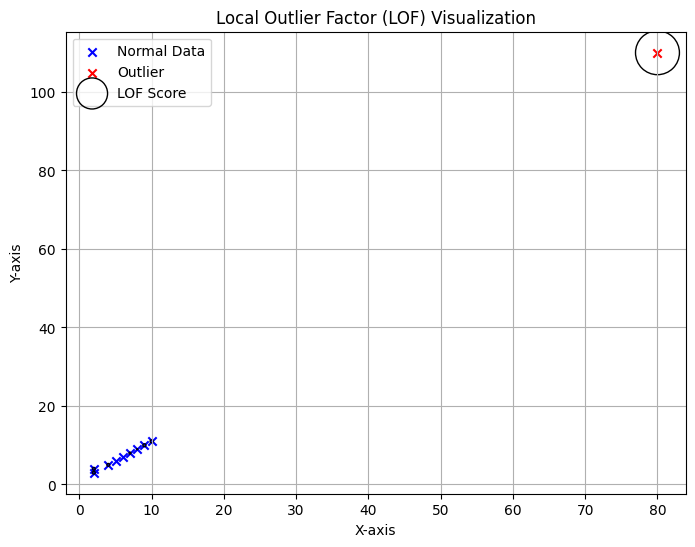

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Data awal
data = np.array([
    [2, 4], [4, 5], [2, 3], [5, 6], [6, 7],
    [7, 8], [8, 9], [9, 10], [80, 110], [10, 11]
])

# Definisikan ground_truth (anggap titik (50, 60) sebagai outlier)
ground_truth = np.array([1]*9 + [-1])  # 1 = normal, -1 = outlier

# LOF model
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
y_pred = clf.fit_predict(data)

# Skor LOF
X_scores = -clf.negative_outlier_factor_

# Visualisasi
plt.figure(figsize=(8, 6))

# Plot titik normal
plt.scatter(data[y_pred == 1, 0], data[y_pred == 1, 1], color='b', marker='x', label='Normal Data')

# Plot outlier
plt.scatter(data[y_pred == -1, 0], data[y_pred == -1, 1], color='r', marker='x', label='Outlier')

# Tambahkan lingkaran untuk menunjukkan tingkat outlier berdasarkan skor LOF
radius = (X_scores - X_scores.min()) / (X_scores.max() - X_scores.min())
plt.scatter(data[:, 0], data[:, 1], s=1000 * radius, edgecolors='k',
            facecolors='none', label='LOF Score')

plt.title('Local Outlier Factor (LOF) Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()
